# Outliers


In [8]:
import pandas as pd

df = pd.read_csv("data/loan_data_all_numerical.csv")
df.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.447978,1.718622,8.031905e+04,5.410333,0.895111,9583.157556,2.323622,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,0.497292,1.062934,8.042250e+04,6.063532,0.965008,6314.886691,1.672702,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,0.000000,8.000000e+03,0.000000,0.000000,500.000000,0.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,4.720400e+04,1.000000,0.000000,5000.000000,1.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,0.000000,2.000000,6.704800e+04,4.000000,0.000000,8000.000000,2.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,9.578925e+04,8.000000,2.000000,12237.250000,4.000000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,1.000000,4.000000,7.200766e+06,125.000000,3.000000,35000.000000,5.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


The features which contain outliers are: [person_age, person_income, person_emp_exp]

First let's take care of person_age.


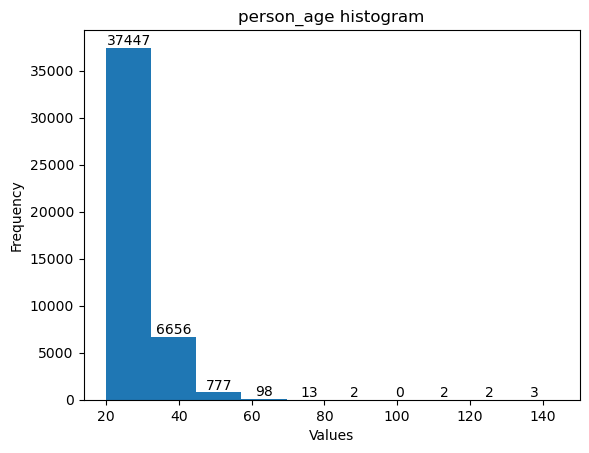

In [9]:
import matplotlib.pyplot as plt
col = "person_age"
data = df[col]
counts, edges, bars = plt.hist(data)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title(f"{col} histogram")
plt.bar_label(bars)
plt.show()

In [10]:
initial_file_path = "data/loan_data_original.csv"
df_init = pd.read_csv(initial_file_path)
df_init[df_init["person_age"] > 80]


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
32416,94.0,male,High School,29738.0,76,RENT,6500.0,MEDICAL,11.01,0.22,27.0,773,No,0
32506,84.0,male,High School,114705.0,61,MORTGAGE,10000.0,PERSONAL,7.51,0.09,24.0,784,Yes,0
37930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


I will delete data for people over 80, because some of it doesn't make sens e.g.:
* person_age = 144, loan_intent = education (highly improbable)

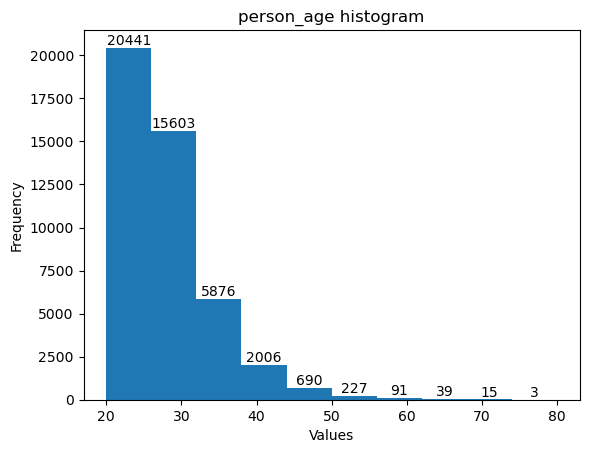

In [11]:
df = df[df["person_age"] <= 80]
col = "person_age"
data = df[col]
counts, edges, bars = plt.hist(data)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title(f"{col} histogram")
plt.bar_label(bars)
plt.show()


Now, let's take care of person income


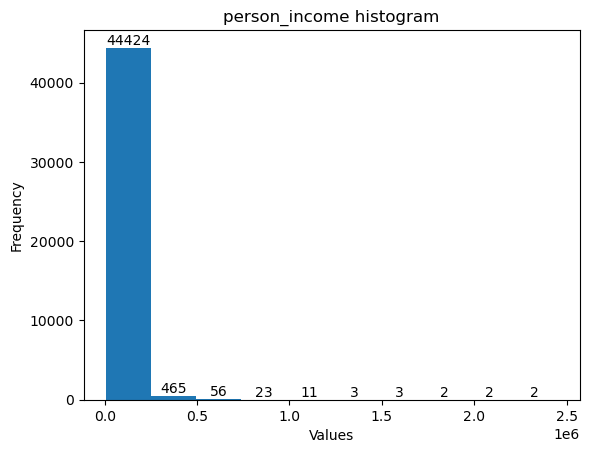

In [12]:
col = "person_income"
data = df[col]
counts, edges, bars = plt.hist(data)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title(f"{col} histogram")
plt.bar_label(bars)
plt.show()

The biggest outliers form this feature were deleted in the previous operation I will leave it like this, because such incomes are possible.

Now person_emp_exp


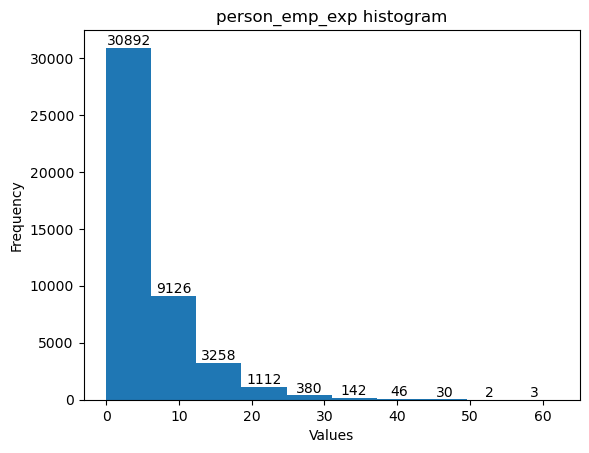

In [13]:
col = "person_emp_exp"
data = df[col]
counts, edges, bars = plt.hist(data)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title(f"{col} histogram")
plt.bar_label(bars)
plt.show()

This one is also valid after deleting too big person_age values



In [14]:
df.to_csv("data/loan_data_all_numerical_no_outliers.csv")